# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, LSTM

In [51]:
# if you are using google colab
#from google.colab import files
#files.upload()

### Print the data
- First 5 rows only

In [52]:
import numpy as np
import pandas as pd

ds = pd.read_csv('daily-minimum-temperatures-in-me.csv')

ds.head(5)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [53]:
ds.set_index('Date', inplace=True)

## Question 2

### Check the total count of null values in the data

In [54]:
ds.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [55]:
ds.dropna(inplace=True)

[link text](https://)## Question 3

### Describe your dataframe
- use describe() method

In [56]:
ds.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

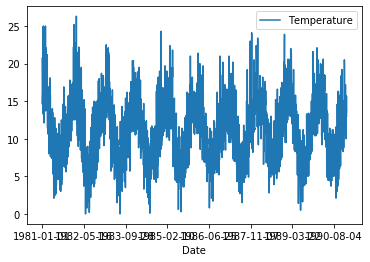

In [57]:
import matplotlib.pyplot as plt

ds.plot()
plt.show()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022527B12408>]],
      dtype=object)

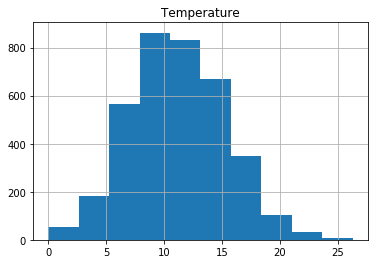

In [58]:
ds.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [59]:
ds['Temperature'].min()

0.0

In [60]:
ds['Temperature'].max()

26.3

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [61]:
train = ds[:int(len(ds)*0.75)]
test = ds[int(len(ds)*0.75):]

In [62]:
print(f'train: {train.shape}')
print(f'test: {test.shape}')

train: (2737, 1)
test: (913, 1)


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [63]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = Scaler.fit_transform(train)
test_scaled = Scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [64]:
print(f'train Scaled:\n {train_scaled[0:5]}')

train Scaled:
 [[0.78707224]
 [0.68060837]
 [0.7148289 ]
 [0.55513308]
 [0.60076046]]


In [65]:
print(f'test Scaled:\n {test_scaled[0:5]}')

test Scaled:
 [[0.22813688]
 [0.22053232]
 [0.18631179]
 [0.19011407]
 [0.31939163]]


## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [66]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [67]:
lookback=1
X_train, y_train = create_seq_data(train_scaled, lookback)
X_test, y_test = create_seq_data(test_scaled, lookback)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [68]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [69]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (2736, 1, 1)
X_test: (912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [70]:
look_back = 1
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back,1), stateful=True))
model.add(Dense(1))

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [71]:
model.compile(loss='mean_squared_error', optimizer='adam')

### summarize your model
- use summary() method

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [73]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size)

Train on 2736 samples
Epoch 1/50
2736/2736 [==============================] - 15s 6ms/sample - loss: 0.0211
Epoch 2/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0102
Epoch 3/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0101
Epoch 4/50
2736/2736 [==============================] - 8s 3ms/sample - loss: 0.0101
Epoch 5/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0101
Epoch 6/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0101
Epoch 7/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0101
Epoch 8/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0100
Epoch 9/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0101
Epoch 10/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0099
Epoch 11/50
2736/2736 [==============================] - 9s 3ms/sample - loss: 0.0100
Epoch 12/50
2736/2736 [=================

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [98]:
y_pred_train = model.predict(X_train, batch_size=1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [97]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [78]:
y_pred_test = model.predict(X_test, batch_size=1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [99]:
y_pred_train = Scaler.inverse_transform(y_pred_train)
y_train = Scaler.inverse_transform([y_train])

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [81]:
y_pred_test = Scaler.inverse_transform(y_pred_test)
y_test = Scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [82]:
import math
from sklearn.metrics import mean_squared_error

In [103]:
Score = math.sqrt(mean_squared_error(y_train[0], y_pred_train[:,0]))
print(f'Train Score: {Score} RMSE')

Train Score: 2.6691615899024654 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [87]:
Score = math.sqrt(mean_squared_error(y_test[0], y_pred_test[:,0]))
print(f'Test Score: {Score} RMSE')

Test Score: 2.56997830178808 RMSE
